### 聚类
无监督学习   
$SSE=\sum_{i=1}^{K}\sum_{x\in{c_i}}dist(x, c_i)^2$ 

In [1]:
import pandas as pd
import seaborn
iris = pd.read_csv('iris.csv')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
57,4.9,2.4,3.3,1.0,versicolor
21,5.1,3.7,1.5,0.4,setosa
135,7.7,3.0,6.1,2.3,virginica
65,6.7,3.1,4.4,1.4,versicolor
117,7.7,3.8,6.7,2.2,virginica
148,6.2,3.4,5.4,2.3,virginica
11,4.8,3.4,1.6,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor


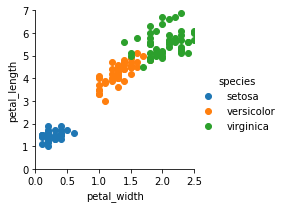

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
g = seaborn.FacetGrid(iris, hue='species')
g.set(xlim=(0, 2.5), ylim=(0,7))
g.map(plt.scatter, 'petal_width', 'petal_length').add_legend()

聚成两类

In [4]:
from sklearn.cluster import KMeans
X = iris[['petal_width', 'petal_length']]
km = KMeans(2)
km.fit(X)
iris['cluster_k2']=km.predict(X)

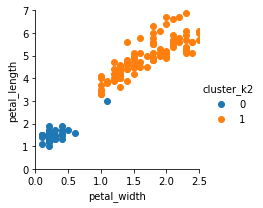

In [5]:
g = seaborn.FacetGrid(iris, hue='cluster_k2')
g.set(xlim=(0, 2.5), ylim=(0,7))
g.map(plt.scatter, 'petal_width', 'petal_length').add_legend()

聚成三类

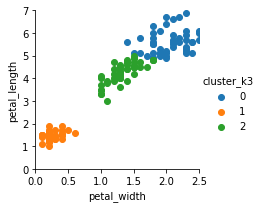

In [6]:
X = iris[['petal_width', 'petal_length']]
km = KMeans(3)
km.fit(X)
iris['cluster_k3']=km.predict(X)
g = seaborn.FacetGrid(iris, hue='cluster_k3')
g.set(xlim=(0, 2.5), ylim=(0,7))
g.map(plt.scatter, 'petal_width', 'petal_length').add_legend()

#### DBSCAN

In [10]:
from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.05)

(array([[ 0.30546082, -0.32331319],
       [ 0.23130558, -0.45370516],
       [-0.30378344,  0.37370431],
       ...,
       [ 0.01719173,  0.53453018],
       [ 0.54054236,  0.84994063],
       [-0.422506  , -0.90335631]]), array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [11]:
df = pd.DataFrame()
df['x1'] = noisy_circles[0][:, 0]
df['x2'] = noisy_circles[0][:, 1]
df['label'] = noisy_circles[1]
df.sample(10)

,x1,x2,label
329,0.098383,0.941007,0
506,0.159792,0.982330,0
35,-0.659229,-0.727266,0
603,1.019243,0.325705,0
833,0.053384,-0.557267,1
261,0.110246,-0.474568,1
217,-0.225838,0.450203,1
849,0.182177,0.403281,1
481,-0.443580,-0.095452,1
691,0.944284,0.045183,0


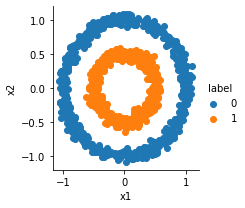

In [13]:
g = seaborn.FacetGrid(df, hue='label')
g.map(plt.scatter, 'x1', 'x2').add_legend()

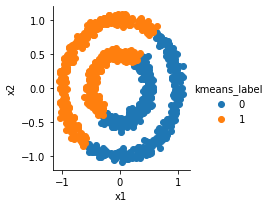

In [14]:
km = KMeans(2)
X = df[['x1', 'x2']]
km.fit(X)
df['kmeans_label'] = km.labels_
g = seaborn.FacetGrid(df, hue='kmeans_label')
g.map(plt.scatter, 'x1', 'x2').add_legend()

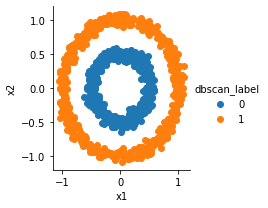

In [15]:
from sklearn.cluster import DBSCAN 
# 调试参数
dbscan = DBSCAN(eps=0.2, min_samples=10)
X = df[['x1', 'x2']]
dbscan.fit(X)
df['dbscan_label'] = dbscan.labels_
g = seaborn.FacetGrid(df, hue='dbscan_label')
g.map(plt.scatter, 'x1', 'x2').add_legend()